## 🔎 Dimensionality Reduction
Dimensionality reduction is a process used in data analysis and machine learning to reduce the number of input variables (or features) in a dataset while retaining as much important information (variance or structure) as possible.

---
## 🔎 PCA
PCA is a dimensionality reduction technique used in machine learning. It transforms the original variables into a new set of variables called principal components (PCs). These components are uncorrelated, and each one captures maximum variance.

- Reduce dimensions while retaining most information
- Visualize high-dimensional data in 2D/3D
- Remove multicollinearity

---
## 🔸 PCA Formulas and Steps
### Key Steps:
- Standardization (optional) – to bring features to the same scale.
- Centering the Data – subtract the mean from each feature.
- Covariance Matrix Computation – shows how variables co-vary.
- Eigen Decomposition – extract eigenvalues and eigenvectors.
- Projection – project data onto principal components.

---
### Key Formulas:

***1. Centering the Data:***
$$
𝑋_{𝑐𝑒𝑛𝑡𝑒𝑟𝑒𝑑} = X−μ
$$
Where μ is the mean of each feature.

***2. Covariance Matrix:***
$$
𝐶 = \frac{1}{n-1}{X_{centered}}^T{X_{centered}}
$$
 
***3. Eigen Decomposition:***
$$
Cv=λv
$$
Where:
- 𝜆: eigenvalue (variance explained)
- 𝑣: eigenvector (principal direction)

***4. Projection:***
$$
𝑍 = 𝑋_{𝑐𝑒𝑛𝑡𝑒𝑟𝑒𝑑}⋅𝑊
$$
Where 𝑊 contains eigenvectors as columns.

## 📊 Sample Dataset

In [50]:
# Import required packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [51]:
# Create a sample dataframe for the model input and manual calculatons
df = pd.DataFrame({
    'Math': [90, 85, 82, 70, 65],
    'Physics': [88, 80, 78, 65, 60]
})
df

,Math,Physics
0,90,88
1,85,80
2,82,78
3,70,65
4,65,60


## 🔸 Standerdize the input

In [52]:
scaler = StandardScaler()
df[['Math', 'Physics']] = scaler.fit_transform(df)

In [61]:
# ploting the scaled data points
fig = plt.figure(figsize=(5,4))
sns.scatterplot(data=df, x='Maths', y='Physics')
plt.show()

ValueError: Could not interpret value `Maths` for `x`. An entry with this name does not appear in `data`.

<Figure size 500x400 with 0 Axes>

## 📝 Manual PCA Calculations

#### ✅ Step 1: Center the Data
We subtract the mean of each feature from the dataset.

1. Compute mean of each column (feature):
$$
μ_1 = \frac{1.2349 + 0.7026 + 0.3832 − 0.8942 − 1.4265}{5} = 0.0
$$
$$
μ_2 = \frac{1.3470+0.5661+0.3709−0.8980−1.3860}{5} = 0.0
$$

So the data is already centered (mean = 0).

---
#### ✅ Step 2: Compute Covariance Matrix
$$
𝐶 = \frac{1}{n-1}{X_{centered}}^T{X_{centered}}
$$
$$
C = \frac{1}{n - 1} X^T X \quad \text{(since the mean is zero)}
$$
Since the data is centered, we don’t need to subtract the mean again.

---
#### 📌 Given Matrices
$$
X = \begin{bmatrix}
1.23488137 & 1.3469987 \\
0.70260492 & 0.56612989 \\
0.38323905 & 0.37091268 \\
-0.89422444 & -0.89799913 \\
-1.4265009 & -1.38604214
\end{bmatrix}
$$
$$
X^T = \begin{bmatrix}
1.23488137 & 0.70260492 & 0.38323905 & -0.89422444 & -1.4265009 \\
1.3469987 & 0.56612989 & 0.37091268 & -0.89799913 & -1.38604214
\end{bmatrix}
$$

The result will be a 2×2 matrix:
$$
C = \frac{1}{n - 1} X^T X = \begin{bmatrix}
C_{11} & C_{12} \\
C_{21} & C_{22}
\end{bmatrix}
$$

Where:
- $C_{11} = \frac{1}{n-1}\sum{x_{i1}^2} = \frac{1}{4}(1.23488^2 + 0.70260^2 + 0.38323^2 + (−0.89422)^2 + (−1.42650)^2) = \frac{1}{4}(5.0010) = 1.2503$
- $C_{12} = C_{21} = \frac{1}{n-1}\sum{x_{i1}x_{i2}} = \frac{1}{4}(1.2349⋅1.347 + 0.7026⋅0.566 + 0.3832⋅0.3709 + (−0.8942)⋅(−0.898) + (−1.4265)⋅(−1.386)) = \frac{1}{4}(4.983) = 1.2457$
- $C_{22} = \frac{1}{n-1}\sum{x_{i2}^2} = \frac{1}{4}(1.347^2 + 0.566^2 + 0.3709^2 + (−0.898)^2 + (−1.386)^2) = \frac{1}{4}(5.0006) = 1.2502$

#### ✅ Final Covariance Matrix
$$
Covariance Matrix = \begin{bmatrix}
Cov(𝑋_1,𝑋_1) & Cov(𝑋_1,𝑋_2) \\
Cov(𝑋_2,𝑋_1) & Cov(𝑋_2,𝑋_2)
\end{bmatrix} 
= \begin{bmatrix}
1.2503 & 1.2457 \\
1.2457 & 1.2502
\end{bmatrix} 
$$

---
## ✅ Step 4: Find Eigenvalues from Characteristic Polynomial

### Covariance matrix:

We want to solve:

$$
\det(C - \lambda I) = 0
$$

That gives:
$$
(1.2503 - \lambda)(1.2502 - \lambda) - (1.2457)^2 = 0
$$

$$
\lambda^2 - 2.5005\lambda + (1.56312506 - 1.551779) = 0
$$
$$
\lambda^2 - 2.5005\lambda + 0.011346 = 0
$$

---

### Solve using quadratic formula:

$$
\lambda = \frac{2.5005 \pm \sqrt{(-2.5005)^2 - 4(1)(0.011346)}}{2}
$$

$$
\lambda = \frac{2.5005 \pm \sqrt{6.2525 - 0.045384}}{2} = \frac{2.5005 \pm \sqrt{6.2071}}{2}
$$

$$
\lambda_1 \approx \frac{2.5005 + 2.4914}{2} = 2.496
$$

$$
\lambda_2 \approx \frac{2.5005 - 2.4914}{2} = 0.0045
$$

### ✅ Eigenvalues:

- $( \lambda_1 \approx 2.496 )$
- $( \lambda_2 \approx 0.0045 )$

---
## ✅ Step 5: Find Eigenvectors

We solve:

$$
(C - \lambda I)\vec{v} = 0
$$

---

### For $( \lambda_1 = 2.496 )$:

$$
C - \lambda_1 I =
\begin{bmatrix}
1.2503 - 2.496 & 1.2457 \\
1.2457 & 1.2502 - 2.496
\end{bmatrix}
= \begin{bmatrix}
-1.2457 & 1.2457 \\
1.2457 & -1.2458
\end{bmatrix}
$$

This simplifies to the equation:

$$
-1.2457x + 1.2457y = 0 \Rightarrow x = y
$$

So one eigenvector is:

$$
\vec{v}_1 = \begin{bmatrix} 1 \\ 1 \end{bmatrix}
$$

### ✅ Need to find Unit Eigenvector:

1. Calculate the magnitude of the vector:

$$
\| \vec{v}_1 \| = \sqrt{1^2 + 1^2} = \sqrt{2}
$$

2. Normalize the vector:

$$
\vec{v}_{1_{norm}} = \frac{1}{\sqrt{2}} \begin{bmatrix} 1 \\ 1 \end{bmatrix} = \begin{bmatrix} 0.7071 \\ 0.7071 \end{bmatrix}
$$

---

### For $( \lambda_2 = 0.0045 )$:

$$
C - \lambda_2 I =
\begin{bmatrix}
1.2503 - 0.0045 & 1.2457 \\
1.2457 & 1.2502 - 0.0045
\end{bmatrix}
= \begin{bmatrix}
1.2458 & 1.2457 \\
1.2457 & 1.2457
\end{bmatrix}
\Rightarrow x = -y
$$

So one eigenvector is:

$$
\vec{v}_2 = \begin{bmatrix} 1 \\ -1 \end{bmatrix}
$$

### ✅ Need to find Unit Eigenvector
1. Calculate the magnitude of the vector:

$$
\| \vec{v}_2 \| = \sqrt{1^2 + (-1)^2} = \sqrt{2}
$$

Normalize the vector:

$$
\vec{v}_{2_{norm}} = \frac{1}{\sqrt{2}} \begin{bmatrix} 1 \\ -1 \end{bmatrix} = \begin{bmatrix} 0.7071 \\ -0.7071 \end{bmatrix}
$$

---

### ✅ Unit Eigenvectors:

- $( \vec{v}_{1_{norm}} = \begin{bmatrix} 0.7071 \\ 0.7071 \end{bmatrix} )$ — Principal Axis 1  
- $( \vec{v}_{2_{norm}} = \begin{bmatrix} 0.7071 \\ -0.7071 \end{bmatrix} )$ — Principal Axis 2
 ---
## ✅ Step 6: Form the Projection Matrix (Feature Vector Matrix)

Take the eigenvectors you calculated and arrange them **column-wise** in a matrix. These are your **principal components**.

Let’s say you keep **both components**:

$$
W = \begin{bmatrix}
0.7071 & 0.7071 \\
0.7071 & -0.7071
\end{bmatrix}
$$

If you only want to keep the **first principal component** (for dimensionality reduction to 1D):

$$
W = \begin{bmatrix}
0.7071 \\
0.7071
\end{bmatrix}
$$

---

### ✅ Step 7: Project the Original Data onto Principal Components

Use the formula:

$$
Z = X \cdot W
$$

Where:
- $( X )$ = Mean-centered original data  
- $( W )$ = Matrix of eigenvectors (principal components)  
- $( Z )$ = Transformed data in PCA space

---
### ✅ First Principal Component Projection Values

Given:

$$
W = \begin{bmatrix} 0.7071 \\ 0.7071 \end{bmatrix}, \quad
X = \begin{bmatrix}
1.2349 & 1.3470 \\
0.7026 & 0.5661 \\
0.3832 & 0.3709 \\
-0.8942 & -0.8980 \\
-1.4265 & -1.3860
\end{bmatrix}
$$

Compute each projection $( z_i = X_i \cdot W )$:

$$
\begin{aligned}
z_1 &= 0.7071 \cdot 1.2349 + 0.7071 \cdot 1.3470 = 0.8736 + 0.9523 = \mathbf{1.8259} \\
z_2 &= 0.7071 \cdot 0.7026 + 0.7071 \cdot 0.5661 = 0.4963 + 0.4004 = \mathbf{0.8967} \\
z_3 &= 0.7071 \cdot 0.3832 + 0.7071 \cdot 0.3709 = 0.2711 + 0.2624 = \mathbf{0.5335} \\
z_4 &= 0.7071 \cdot (-0.8942) + 0.7071 \cdot (-0.8980) = -0.6326 - 0.6348 = \mathbf{-1.2674} \\
z_5 &= 0.7071 \cdot (-1.4265) + 0.7071 \cdot (-1.3860) = -1.0088 - 0.9803 = \mathbf{-1.9891}
\end{aligned}
$$

---

### 📌 Final Projected Data:

$$
Z = \begin{bmatrix}
1.8259 \\
0.8967 \\
0.5335 \\
-1.2674 \\
-1.9891
\end{bmatrix}
$$

---
2


In [53]:
# Apply PCA
pca = PCA(n_components=1)  # Keep only 1 principal component
df['first_PC'] = pca.fit_transform(df)

In [54]:
# Display results
print("First Principal Component Projection Values (Z):")
print(df['first_PC'])

First Principal Component Projection Values (Z):
0    1.825665
1    0.897131
2    0.533266
3   -1.267293
4   -1.988768
Name: first_PC, dtype: float64


In [55]:
# Output the components (eigenvectors)
print("\nEigenvectors (Principal Components):")
print(pca.components_)


Eigenvectors (Principal Components):
[[0.70710678 0.70710678]]


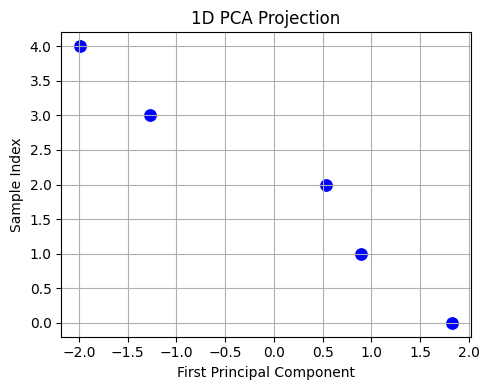

In [60]:
plt.figure(figsize=(5, 4))  
sns.scatterplot(data=df, y=df.index, x="first_PC", s=100, color='blue')
plt.title("1D PCA Projection")
plt.xlabel("First Principal Component")
plt.ylabel("Sample Index")
plt.grid(True)
plt.tight_layout()
plt.show()